In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [228]:
df=pd.read_csv('sleep_data.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [229]:
df_processed=df.drop(columns=['Person ID'])
df_processed.columns=[col.lower().replace(' ','_') for col in df_processed.columns]
df_processed.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [230]:
df_processed[['systolic_bp','diastolic_bp']]= df_processed['blood_pressure'].str.split('/', expand=True)
#here expand true makes the split into two seperate columns instead of a list in one column
#df_processed[['systolic_bp','diastolic_bp']] is used to assign two columns creaated in the right side. cuz expand true creates two columns
df_processed=df_processed.drop(columns=['blood_pressure'])
df_processed.head()


,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,sleep_disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [231]:
cat_cols=[cols for cols in df_processed.columns if df_processed[cols].dtype=='object']
num_cols=[cols for cols in df_processed.columns if df_processed[cols].dtype!='object']


In [232]:
df_processed['sleep_disorder']=df_processed['sleep_disorder'].replace('None',0)
df_processed=pd.get_dummies(df_processed,columns=['gender','occupation','bmi_category','sleep_disorder'],drop_first=True,dtype=bool)
df_processed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              374 non-null    int64  
 1   sleep_duration                   374 non-null    float64
 2   quality_of_sleep                 374 non-null    int64  
 3   physical_activity_level          374 non-null    int64  
 4   stress_level                     374 non-null    int64  
 5   heart_rate                       374 non-null    int64  
 6   daily_steps                      374 non-null    int64  
 7   systolic_bp                      374 non-null    object 
 8   diastolic_bp                     374 non-null    object 
 9   gender_Male                      374 non-null    bool   
 10  occupation_Doctor                374 non-null    bool   
 11  occupation_Engineer              374 non-null    bool   
 12  occupation_Lawyer     

In [233]:
df_processed.head()

,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps,systolic_bp,diastolic_bp,gender_Male,...,occupation_Sales Representative,occupation_Salesperson,occupation_Scientist,occupation_Software Engineer,occupation_Teacher,bmi_category_Normal Weight,bmi_category_Obese,bmi_category_Overweight,sleep_disorder_Insomnia,sleep_disorder_Sleep Apnea
0,27,6.1,6,42,6,77,4200,126,83,True,...,False,False,False,True,False,False,False,True,False,False
1,28,6.2,6,60,8,75,10000,125,80,True,...,False,False,False,False,False,False,False,False,False,False
2,28,6.2,6,60,8,75,10000,125,80,True,...,False,False,False,False,False,False,False,False,False,False
3,28,5.9,4,30,8,85,3000,140,90,True,...,True,False,False,False,False,False,True,False,False,True
4,28,5.9,4,30,8,85,3000,140,90,True,...,True,False,False,False,False,False,True,False,False,True


In [234]:
df_processed['systolic_bp']=pd.to_numeric(df_processed['systolic_bp'],errors='coerce')
df_processed['diastolic_bp']=pd.to_numeric(df_processed['diastolic_bp'],errors='coerce')

In [235]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              374 non-null    int64  
 1   sleep_duration                   374 non-null    float64
 2   quality_of_sleep                 374 non-null    int64  
 3   physical_activity_level          374 non-null    int64  
 4   stress_level                     374 non-null    int64  
 5   heart_rate                       374 non-null    int64  
 6   daily_steps                      374 non-null    int64  
 7   systolic_bp                      374 non-null    int64  
 8   diastolic_bp                     374 non-null    int64  
 9   gender_Male                      374 non-null    bool   
 10  occupation_Doctor                374 non-null    bool   
 11  occupation_Engineer              374 non-null    bool   
 12  occupation_Lawyer     

In [236]:
df_processed.columns

Index(['age', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level',
       'stress_level', 'heart_rate', 'daily_steps', 'systolic_bp',
       'diastolic_bp', 'gender_Male', 'occupation_Doctor',
       'occupation_Engineer', 'occupation_Lawyer', 'occupation_Manager',
       'occupation_Nurse', 'occupation_Sales Representative',
       'occupation_Salesperson', 'occupation_Scientist',
       'occupation_Software Engineer', 'occupation_Teacher',
       'bmi_category_Normal Weight', 'bmi_category_Obese',
       'bmi_category_Overweight', 'sleep_disorder_Insomnia',
       'sleep_disorder_Sleep Apnea'],
      dtype='object')

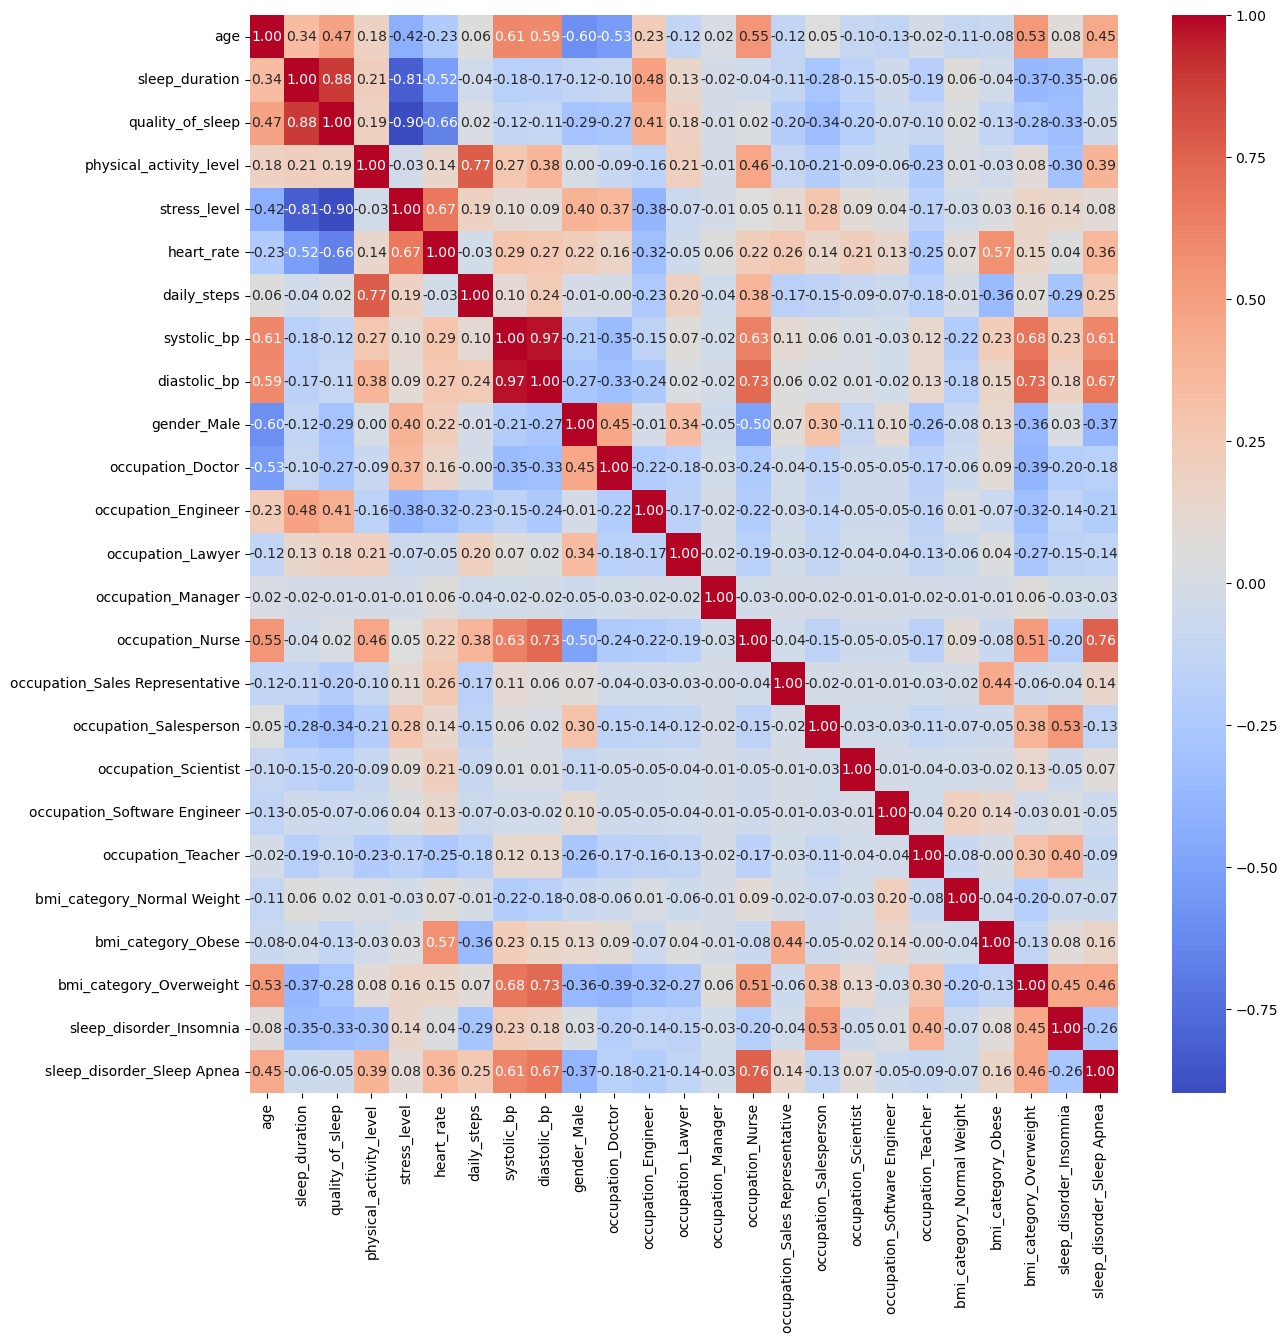

In [237]:
import seaborn as sns
corr=df_processed.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [238]:
float_cols=[cols for cols in df_processed.columns if df_processed[cols].dtype!='bool']
df_processed[float_cols]=df_processed[float_cols].astype('float32')
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              374 non-null    float32
 1   sleep_duration                   374 non-null    float32
 2   quality_of_sleep                 374 non-null    float32
 3   physical_activity_level          374 non-null    float32
 4   stress_level                     374 non-null    float32
 5   heart_rate                       374 non-null    float32
 6   daily_steps                      374 non-null    float32
 7   systolic_bp                      374 non-null    float32
 8   diastolic_bp                     374 non-null    float32
 9   gender_Male                      374 non-null    bool   
 10  occupation_Doctor                374 non-null    bool   
 11  occupation_Engineer              374 non-null    bool   
 12  occupation_Lawyer     

In [239]:
corr['stress_level'].sort_values(ascending=False)   

stress_level                       1.000000
heart_rate                         0.670026
gender_Male                        0.396018
occupation_Doctor                  0.368038
occupation_Salesperson             0.278757
daily_steps                        0.186829
bmi_category_Overweight            0.157406
sleep_disorder_Insomnia            0.139380
occupation_Sales Representative    0.108196
systolic_bp                        0.102818
occupation_Scientist               0.094753
diastolic_bp                       0.091811
sleep_disorder_Sleep Apnea         0.081582
occupation_Nurse                   0.045274
occupation_Software Engineer       0.036081
bmi_category_Obese                 0.029459
occupation_Manager                -0.011250
bmi_category_Normal Weight        -0.026776
physical_activity_level           -0.034134
occupation_Lawyer                 -0.068714
occupation_Teacher                -0.167945
occupation_Engineer               -0.379980
age                             

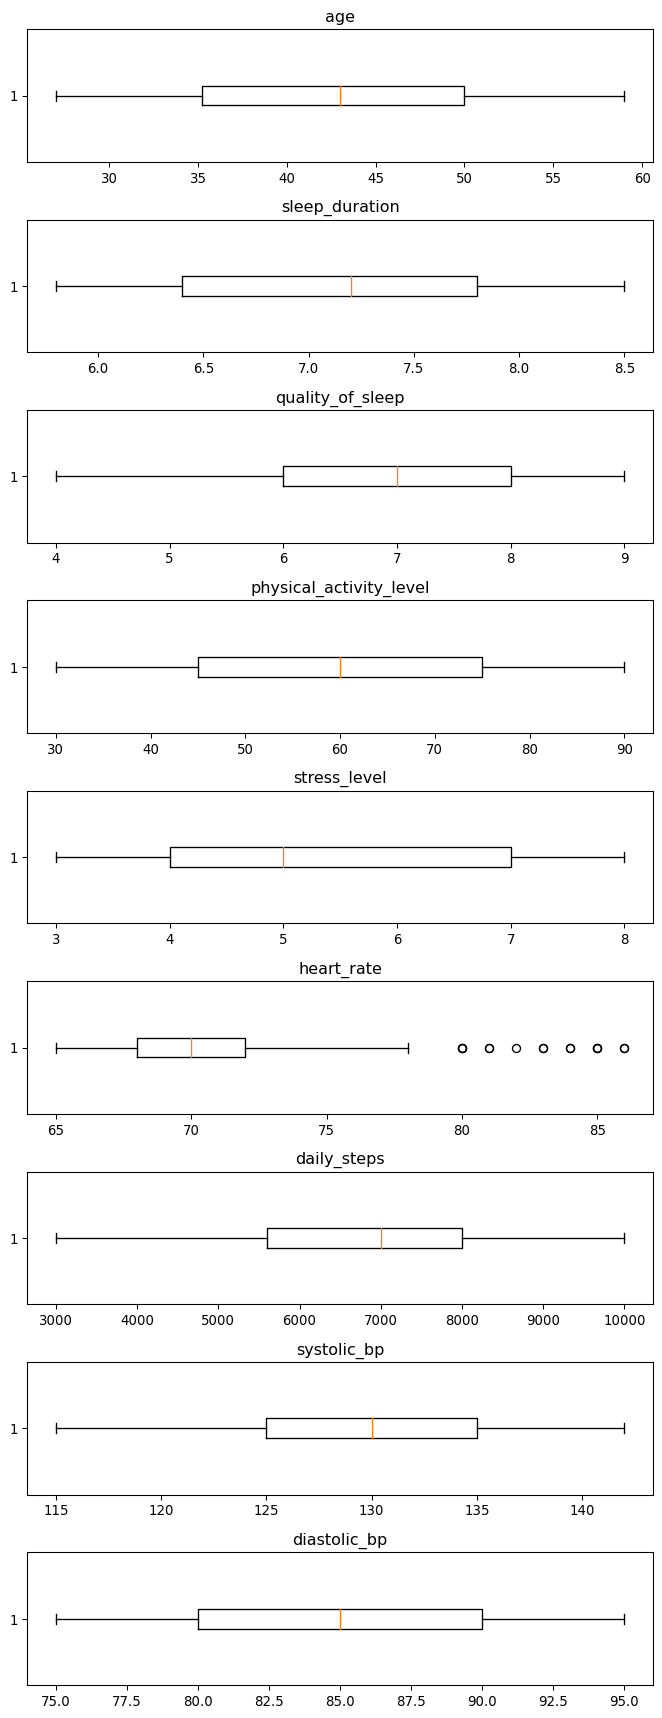

In [240]:
fig, ax = plt.subplots(len(float_cols), 1, figsize=(7, 18), dpi=96)
for i, col in enumerate(float_cols):
    ax[i].boxplot(df_processed[col], vert=False)
    ax[i].set_title(col)
plt.tight_layout()

In [241]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              374 non-null    float32
 1   sleep_duration                   374 non-null    float32
 2   quality_of_sleep                 374 non-null    float32
 3   physical_activity_level          374 non-null    float32
 4   stress_level                     374 non-null    float32
 5   heart_rate                       374 non-null    float32
 6   daily_steps                      374 non-null    float32
 7   systolic_bp                      374 non-null    float32
 8   diastolic_bp                     374 non-null    float32
 9   gender_Male                      374 non-null    bool   
 10  occupation_Doctor                374 non-null    bool   
 11  occupation_Engineer              374 non-null    bool   
 12  occupation_Lawyer     

In [242]:
#get outliers
q1=np.percentile(df_processed['heart_rate'],25)
q3=np.percentile(df_processed['heart_rate'],75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
cleaned_df = df_processed[(df_processed['heart_rate'] >= lower_bound) & (df_processed['heart_rate'] <= upper_bound)]

In [243]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 373
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              359 non-null    float32
 1   sleep_duration                   359 non-null    float32
 2   quality_of_sleep                 359 non-null    float32
 3   physical_activity_level          359 non-null    float32
 4   stress_level                     359 non-null    float32
 5   heart_rate                       359 non-null    float32
 6   daily_steps                      359 non-null    float32
 7   systolic_bp                      359 non-null    float32
 8   diastolic_bp                     359 non-null    float32
 9   gender_Male                      359 non-null    bool   
 10  occupation_Doctor                359 non-null    bool   
 11  occupation_Engineer              359 non-null    bool   
 12  occupation_Lawyer     

In [244]:
cleaned_df.duplicated().sum()

238

In [245]:
cleaned_df.loc[cleaned_df.duplicated()]

,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps,systolic_bp,diastolic_bp,gender_Male,...,occupation_Sales Representative,occupation_Salesperson,occupation_Scientist,occupation_Software Engineer,occupation_Teacher,bmi_category_Normal Weight,bmi_category_Obese,bmi_category_Overweight,sleep_disorder_Insomnia,sleep_disorder_Sleep Apnea
2,28.0,6.2,6.0,60.0,8.0,75.0,10000.0,125.0,80.0,True,...,False,False,False,False,False,False,False,False,False,False
8,29.0,7.8,7.0,75.0,6.0,70.0,8000.0,120.0,80.0,True,...,False,False,False,False,False,False,False,False,False,False
9,29.0,7.8,7.0,75.0,6.0,70.0,8000.0,120.0,80.0,True,...,False,False,False,False,False,False,False,False,False,False
11,29.0,7.8,7.0,75.0,6.0,70.0,8000.0,120.0,80.0,True,...,False,False,False,False,False,False,False,False,False,False
12,29.0,6.1,6.0,30.0,8.0,70.0,8000.0,120.0,80.0,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59.0,8.1,9.0,75.0,3.0,68.0,7000.0,140.0,95.0,False,...,False,False,False,False,False,False,False,True,False,True
370,59.0,8.0,9.0,75.0,3.0,68.0,7000.0,140.0,95.0,False,...,False,False,False,False,False,False,False,True,False,True
371,59.0,8.1,9.0,75.0,3.0,68.0,7000.0,140.0,95.0,False,...,False,False,False,False,False,False,False,True,False,True
372,59.0,8.1,9.0,75.0,3.0,68.0,7000.0,140.0,95.0,False,...,False,False,False,False,False,False,False,True,False,True


In [246]:
cleaned_df.drop_duplicates(inplace=True) 
#after dropping rows the indexes will be messed so resetting is best 
cleaned_df=cleaned_df.reset_index(drop=True)
cleaned_df.duplicated().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14124\4223946120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop_duplicates(inplace=True)


0

In [247]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              121 non-null    float32
 1   sleep_duration                   121 non-null    float32
 2   quality_of_sleep                 121 non-null    float32
 3   physical_activity_level          121 non-null    float32
 4   stress_level                     121 non-null    float32
 5   heart_rate                       121 non-null    float32
 6   daily_steps                      121 non-null    float32
 7   systolic_bp                      121 non-null    float32
 8   diastolic_bp                     121 non-null    float32
 9   gender_Male                      121 non-null    bool   
 10  occupation_Doctor                121 non-null    bool   
 11  occupation_Engineer              121 non-null    bool   
 12  occupation_Lawyer     

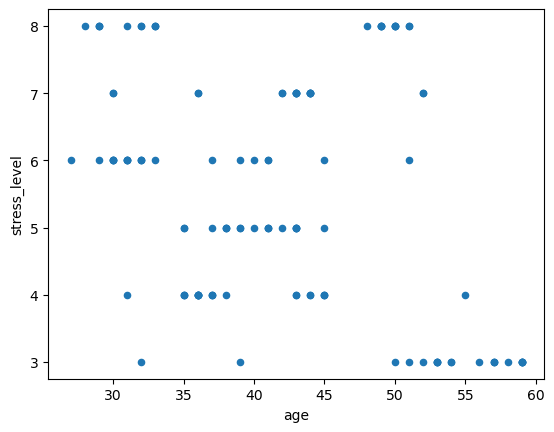

In [250]:
ax=cleaned_df.plot(kind='scatter',x='age',y='stress_level')
plt.show()

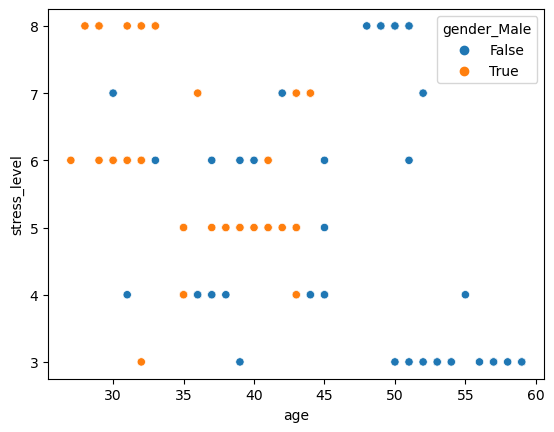

In [252]:
ax=sns.scatterplot(data=cleaned_df,x='age',y='stress_level',hue='gender_Male')
plt.show()

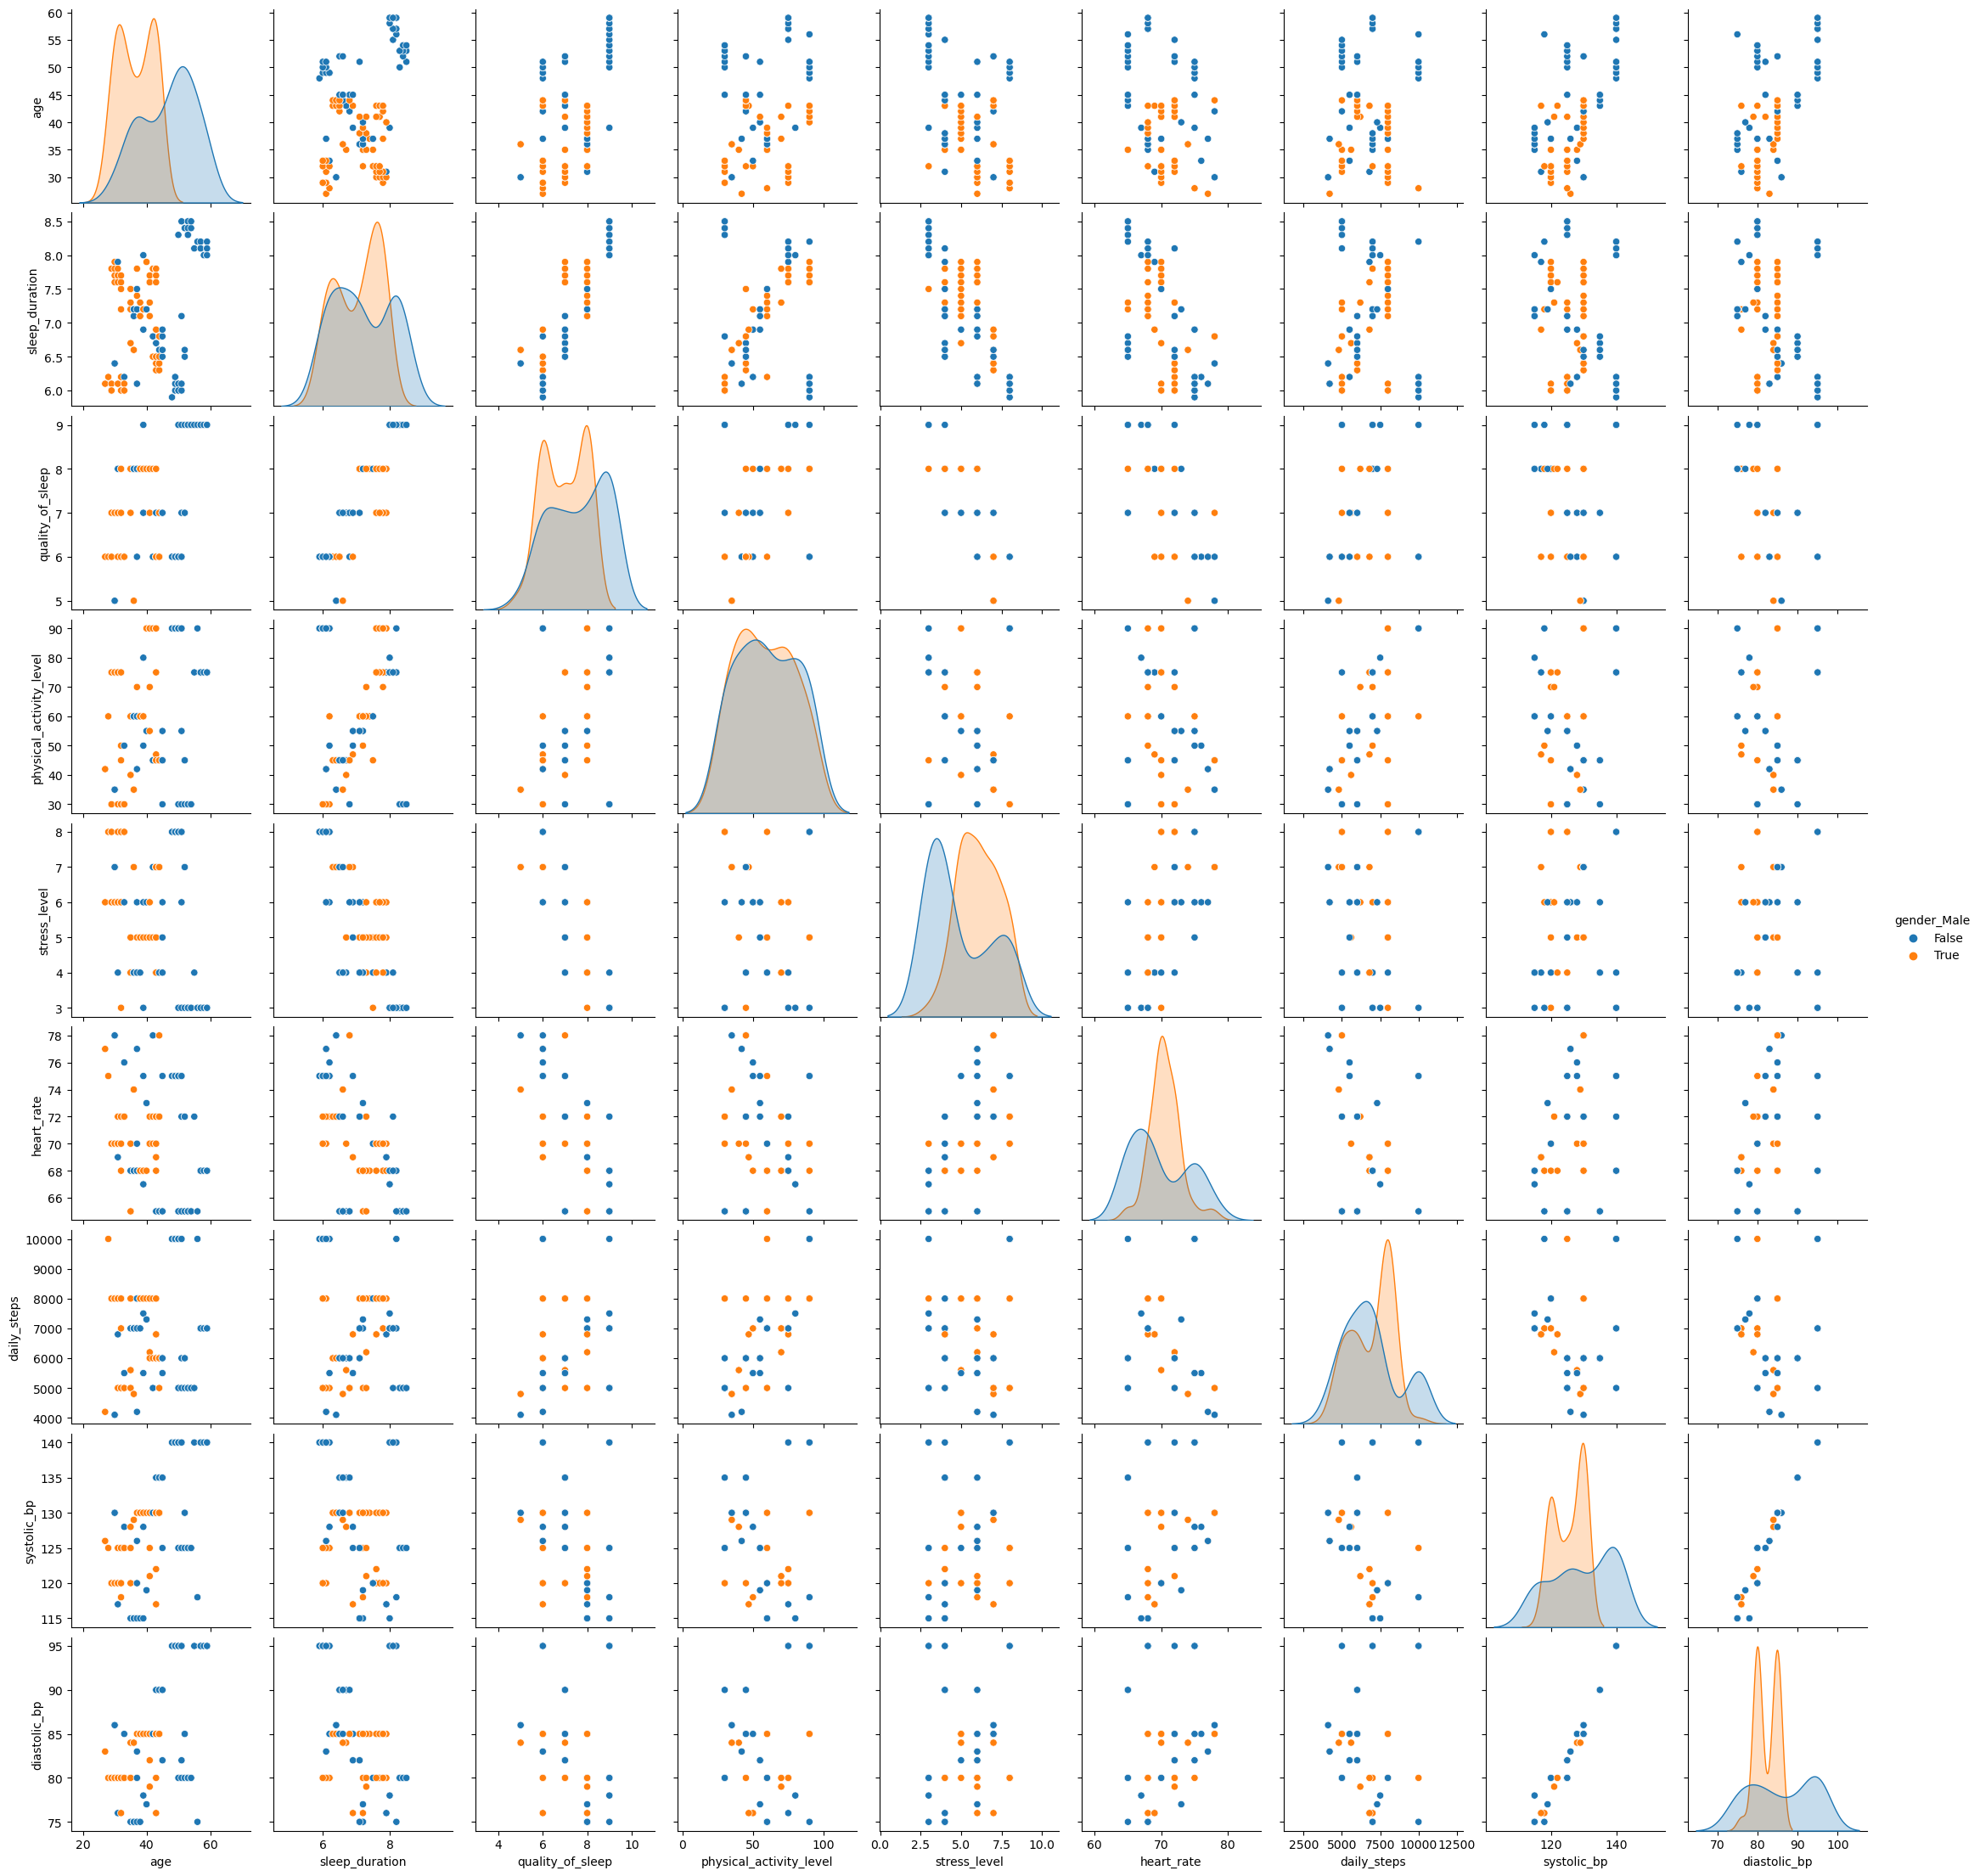

In [253]:
ax=sns.pairplot(data=cleaned_df, vars=float_cols, hue='gender_Male')
plt.show()

In [ ]:
X=df_processed.drop(columns=['stress_level'])   
y=df_processed['stress_level']
X.head()

,age,sleep_duration,quality_of_sleep,physical_activity_level,heart_rate,daily_steps,systolic_bp,diastolic_bp,gender_Male,occupation_Doctor,...,occupation_Sales Representative,occupation_Salesperson,occupation_Scientist,occupation_Software Engineer,occupation_Teacher,bmi_category_Normal Weight,bmi_category_Obese,bmi_category_Overweight,sleep_disorder_Insomnia,sleep_disorder_Sleep Apnea
0,27.0,6.1,6.0,42.0,77.0,4200.0,126.0,83.0,True,False,...,False,False,False,True,False,False,False,True,False,False
1,28.0,6.2,6.0,60.0,75.0,10000.0,125.0,80.0,True,True,...,False,False,False,False,False,False,False,False,False,False
2,28.0,6.2,6.0,60.0,75.0,10000.0,125.0,80.0,True,True,...,False,False,False,False,False,False,False,False,False,False
3,28.0,5.9,4.0,30.0,85.0,3000.0,140.0,90.0,True,False,...,True,False,False,False,False,False,True,False,False,True
4,28.0,5.9,4.0,30.0,85.0,3000.0,140.0,90.0,True,False,...,True,False,False,False,False,False,True,False,False,True


In [ ]:
y.head()

0    6.0
1    8.0
2    8.0
3    8.0
4    8.0
Name: stress_level, dtype: float32

* To use logistic regression the data should be sclaed as standard scale

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
float_cols.remove('stress_level')
X_normalized = X.copy()
X_normalized[float_cols]=scaler.fit_transform(X_normalized[float_cols])
X_normalized.head()

,age,sleep_duration,quality_of_sleep,physical_activity_level,heart_rate,daily_steps,systolic_bp,diastolic_bp,gender_Male,occupation_Doctor,...,occupation_Sales Representative,occupation_Salesperson,occupation_Scientist,occupation_Software Engineer,occupation_Teacher,bmi_category_Normal Weight,bmi_category_Obese,bmi_category_Overweight,sleep_disorder_Insomnia,sleep_disorder_Sleep Apnea
0,-1.753096,-1.298887,-1.098280,-0.825418,1.654719,-1.619584,-0.330002,-0.268102,True,False,...,False,False,False,True,False,False,False,True,False,False
1,-1.637643,-1.173036,-1.098280,0.039844,1.170474,1.970077,-0.459239,-0.755640,True,True,...,False,False,False,False,False,False,False,False,False,False
2,-1.637643,-1.173036,-1.098280,0.039844,1.170474,1.970077,-0.459239,-0.755640,True,True,...,False,False,False,False,False,False,False,False,False,False
3,-1.637643,-1.550588,-2.771424,-1.402260,3.591698,-2.362273,1.479309,0.869486,True,False,...,True,False,False,False,False,False,True,False,False,True
4,-1.637643,-1.550588,-2.771424,-1.402260,3.591698,-2.362273,1.479309,0.869486,True,False,...,True,False,False,False,False,False,True,False,False,True


Previously we used MinMaxScaler and here we use StandardScalar
* when using MinMaxScalar the scale is in a range of 0 -> 1
* when using StandardScalar the scale sets the mean to 0 and standard deviation to 1 

* MinMaxScalar is more sensitive to outliers than StandardScalar 

* MinMaxScalar is used for deeplearning to fit the values to 0-1 range,
  Rescale to a known boundry
* StandardScalar is used for networks which expect normal distribution
  Used for datasets with outliers cuz it works well even with small outliers
  When you dont know the feature bounds 



In [ ]:
y.nunique()

6

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  1 12  1  0  0]
 [ 0  1  0  8  1  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  1 16]]
              precision    recall  f1-score   support

         3.0       1.00      1.00      1.00        12
         4.0       0.83      1.00      0.91        10
         5.0       1.00      0.86      0.92        14
         6.0       0.89      0.80      0.84        10
         7.0       0.86      1.00      0.92        12
         8.0       1.00      0.94      0.97        17

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



* confusion matrix is a tabel with output width x output width matrix with row number representing actual class and column number representing predicted class

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 17]]
              precision    recall  f1-score   support

         3.0       1.00      1.00      1.00        12
         4.0       1.00      1.00      1.00        10
         5.0       1.00      1.00      1.00        14
         6.0       1.00      1.00      1.00        10
         7.0       1.00      1.00      1.00        12
         8.0       1.00      1.00      1.00        17

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

